# 💻 Henting av data fra OpenStreetMap

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GMGI221-2024/forelesninger/blob/main/12_OSM_data.ipynb)

## Hva er OpenStreetMap?

```{figure} imgs/osm-logo_256x256px.svg
:alt: Logoet til OpenStreetMap (OSM)

OpenStreetMap er en gratis og åpen karttjeneste, men - først og fremst - er det
et globalt samarbeidsprosjekt for å samle inn frie og åpne geodata. *Kilde:
[wiki.openstreetmap.org](https://wiki.openstreetmap.org/wiki/Logos)*
```

OpenStreetMap (OSM) er en global samarbeidsdatabase (crowd-sourced) og
prosjekt som har som mål å lage et fritt redigerbart kart over verden som inneholder
informasjon om verden rundt oss. Den inneholder data om gater, bygninger,
forskjellige tjenester og arealbruk, for å nevne noe.
De innsamlede dataene er også grunnlaget for kartet på [openstreetmap.org](https://openstreetmap.org/). 


```{admonition} Bidra!
:class: note

Du kan også registrere deg som bidragsyter hvis du vil legge til i databasen og
kartet eller korrigere og forbedre eksisterende data. Les mer i [OpenStreetMap
Wiki](https://wiki.openstreetmap.org/wiki/Main_Page).
```


OSM har mer enn 8 millioner registrerte brukere som bidrar med rundt 4 millioner
endringer daglig. Databasen inneholder data som er beskrevet av [mer enn 7
milliarder noder](http://wiki.openstreetmap.org/wiki/Stats) (som utgjør linjer,
polygoner og andre objekter).

Mens den mest kjente siden av OpenStreetMap er kartet selv, som [vi
har brukt som et bakgrunnskart](#11_statiske_kart), er prosjektet mye
mer enn det. OSMs data kan brukes til mange andre formål som
**ruting**, **geokoding**, **utdanning** og **forskning**. OSM brukes også mye
for humanitær respons, for eksempel i kriseområder (for eksempel etter naturkatastrofer) og for å fremme økonomisk utvikling. Les mer om humanitære
prosjekter som bruker OSM-data fra [Humanitarian OpenStreetMap Team (HOTOSM)
nettsted](https://www.hotosm.org).

## Hovedverktøy i denne leksjonen

### OSMnx

Denne uken skal vi utforske en Python-pakke kalt
[OSMnx](https://github.com/gboeing/osmnx) som kan brukes til å hente gate-nettverk fra OpenStreetMap, og konstruere, analysere og visualisere dem. OSMnx
kan også hente data om interessepunkter, som restauranter, skoler og
forskjellige typer tjenester. Pakken inkluderer også verktøy for å finne ruter på
et nettverk lastet ned fra OpenStreetMap, og implementerer algoritmer for å finne
korteste forbindelser for gange, sykling eller kjøring.


For å få en oversikt over mulighetene med pakken, se den innledende
videoen gitt av hovedutvikleren av pakken, Prof. Geoff Boeing: ["Meet
the developer: Introduction to OSMnx package by Geoff
Boeing"](https://www.youtube.com/watch?v=Q0uxu25ddc4&list=PLs9D4XVqc6dCAhhvhZB7aHGD8fCeCC_6N).

Det er også en vitenskapelig artikkel tilgjengelig som beskriver pakken:

> Boeing, G. 2017. ["OSMnx: New Methods for Acquiring, Constructing, Analyzing,
> and Visualizing Complex Street
> Networks."](https://www.researchgate.net/publication/309738462_OSMnx_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks)
> Computers, Environment and Urban Systems 65, 126-139.
> doi:10.1016/j.compenvurbsys.2017.05.004

[Denne
opplæringen](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/01-overview-osmnx.ipynb)
gir en praktisk oversikt over OSMnx-funksjonaliteter, og har også inspirert
denne notebooken.


### NetworkX

Vi vil også bruke [NetworkX](https://networkx.github.io/documentation//)
til å manipulere og analysere gatenettverksdataene hentet fra
OpenStreetMap. NetworkX er en Python-pakke som kan brukes til å opprette,
manipulere og studere strukturen, dynamikken og funksjonene til komplekse
nettverk.


---

## Last ned og visualiser OpenStreetMap-data med OSMnx

En nyttig funksjon med OSMnx er enkle å bruke verktøy for å laste ned
[OpenStreetMap](http://www.openstreetmap.org)-data via prosjektets [OverPass
API](http://wiki.openstreetmap.org/wiki/Overpass_API).
I denne delen vil vi lære å laste ned og visualisere gatenettverket
og tilleggsdata fra OpenStreetMap som dekker et interesseområde.


### Gatenettverk

[`osmnx.graph`
modulen](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.graph)
laster ned data for å konstruere en kjørbart vei-nettverksgraf, basert på et
brukerdefinert interesseområde. Dette interesseområdet kan spesifiseres, for
eksempel ved bruk av et stedsnavn, en begrensningsboks eller et polygon. Her vil vi bruke
et stedsnavn for å hente data som dekker Grünerløkka bydel i Oslo.

I stedsnavnsforespørselen bruker OSMnx Nominatim Geocoding API. Dette betyr
at stedsnavn må eksistere i OpenStreetMap-databasen (kjør et testsøk
på [openstreetmap.org](https://www.openstreetmap.org/) eller
[nominatim.openstreetmap.org](https://nominatim.openstreetmap.org/ui/search.html)).

Vi vil lese et OSM-gatenettverk ved hjelp av OSMnxs
[graph_from_place()](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.graph.graph_from_place)-funksjon:

In [2]:
import osmnx

PLACE_NAME = "Grunerløkka, Oslo, Norway"
graph = osmnx.graph_from_place(PLACE_NAME)

Sjekk datatypen til grafen:

In [3]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

Det vi har her er et
[`networkx.MultiDiGraph`](https://networkx.org/documentation/stable/reference/classes/multidigraph.html) objekt.

OSMnxs grafer har ikke en innebygd metode for å plotte dem, men pakken
kommer med en funksjon for å gjøre det:

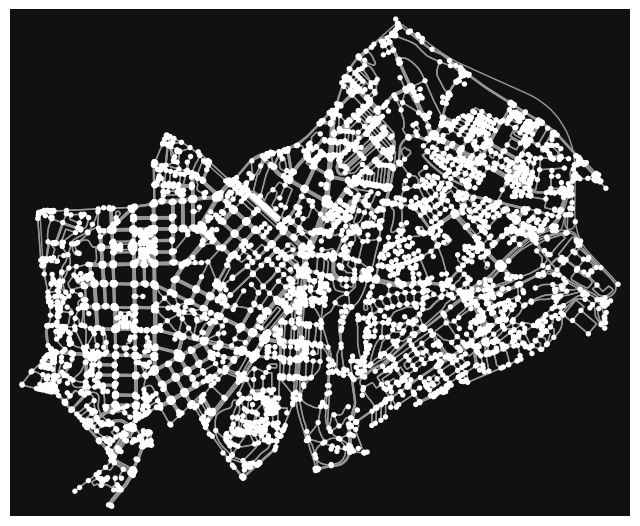

In [3]:
figure, ax = osmnx.plot_graph(graph)

Akkurat som dens GeoPandas- og Pandas-ekvivalenter, bruker `osmnx.plot_graph()`
matplotlib. Funksjonen returnerer en `(figure, axes)`-tuple, som kan brukes til 
å modifisere figuren ved hjelp av alle matplotlib-funksjonene vi allerede har blitt kjent med.

Vi kan se at grafen vår inneholder noder (punktene) og kanter (linjene)
som kobler disse nodene til hverandre.

### Konverter en graf til `GeoDataFrame`s

Gatenettverket vi nettopp lastet ned er en *graf*, mer spesifikt en
`networkx.MultiDiGraph`. Hovedformålet er å representere de topologiske
forholdene mellom noder og koblingene (kanter) mellom dem. Noen ganger er det mer praktisk å ha de underliggende geodataene i `geopandas.GeoDataFrame`s.
OSMnx kommer med en praktisk funksjon som konverterer en graf til to geodataframes, en for noder, og en for kanter:
[`osmnx.graph_to_gdfs()`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.utils_graph.graph_to_gdfs).

In [4]:
nodes, edges = osmnx.graph_to_gdfs(graph)

In [5]:
nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
79448,59.921558,10.750823,3,NaN,NaN,POINT (10.75082 59.92156)
79465,59.928495,10.761100,4,traffic_signals,NaN,POINT (10.76110 59.92850)
79475,59.928343,10.759132,4,traffic_signals,NaN,POINT (10.75913 59.92834)
79476,59.928694,10.764892,4,traffic_signals,NaN,POINT (10.76489 59.92869)
79490,59.929560,10.768588,5,traffic_signals,NaN,POINT (10.76859 59.92956)


In [6]:
edges.head()

osmid lanes           name    highway  oneway  \
u     v          key                                                      
79448 3165357950 0    129061337     2  Maridalsveien  secondary   False   
79465 3441703718 0      4211442     2    Toftes gate  secondary   False   
      3441703770 0    349267814     2    Toftes gate  secondary   False   
      1469875895 0    882463938     3     Sannergata   tertiary   False   
      1469875898 0    882463954     3     Sannergata   tertiary   False   

                     reversed   length  \
u     v          key                     
79448 3165357950 0      False  107.935   
79465 3441703718 0       True    8.531   
      3441703770 0      False    8.408   
      1469875895 0       True   10.489   
      1469875898 0      False    6.402   

                                                               geometry  \
u     v          key                                                      
79448 3165357950 0    LINESTRING (10.75082 59.92156, 10.75078 59.921...   
79465 3441703718 0    LINESTRING (10.76110 59.92850, 10.76110 59.92842)   
      3441703770 0    LINESTRING (10.76110 59.92850, 10.76110 59.92857)   
      1469875895 0    LINESTRING (10.76110 59.92850, 10.76107 59.928...   
      1469875898 0    LINESTRING (10.76110 59.92850, 10.76113 59.928...   

                     maxspeed width  ref junction bridge service access tunnel  
u     v          key                                                            
79448 3165357950 0        NaN   NaN  NaN      NaN    NaN     NaN    NaN    NaN  
79465 3441703718 0        NaN   NaN  NaN      NaN    NaN     NaN    NaN    NaN  
      3441703770 0         40   NaN  NaN      NaN    NaN     NaN    NaN    NaN  
      1469875895 0         40   NaN  NaN      NaN    NaN     NaN    NaN    NaN  
      1469875898 0         40   NaN  NaN      NaN    NaN     NaN    NaN    NaN

Fint! Nå, som vi kan se, har vi grafen vår som GeoDataFrames og vi kan plotte
dem ved hjelp av de samme funksjonene og verktøyene som vi har brukt før.



### Stedspolygon

La oss også plotte polygonet som representerer vårt interesseområde (Grünerløkka,
Oslo). Vi kan hente polygon-geometrien ved hjelp av
[osmnx.geocode_to_gdf()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geocode_to_gdf(#osmnx.geocoder.geocode_to_gdf))
funksjonen.

In [7]:
# Hent stedsgrensen relatert til stedsnavnet som en geodataframe
area = osmnx.geocode_to_gdf(PLACE_NAME)

Som navnet på funksjonen allerede forteller oss, returnerer den et GeoDataFrame-objekt
basert på det spesifiserte stedsnavnsøket. La oss fortsatt verifisere datatypen:

In [8]:
# Sjekk datatypen
type(area)

geopandas.geodataframe.GeoDataFrame

La oss også ta en titt på dataene:

In [9]:
# Sjekk dataverdier
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((10.74799 59.91964, 10.74992 59.91939...",59.937559,59.913477,10.80766,10.747989,144164787,relation,1279942,59.925471,10.777421,boundary,administrative,18,0.30001,suburb,Grünerløkka,"Grünerløkka, Oslo, Norway"


<Axes: >

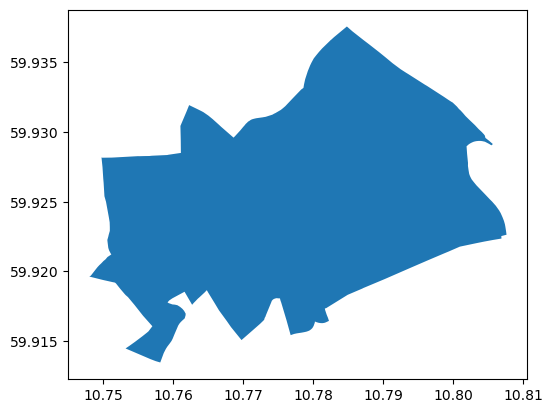

In [10]:
# Plot området:
area.plot()

### Bygningsavtrykk

I tillegg til nettverksdata, kan OSMnx også laste ned alle andre data som finnes i OpenStreetMap-databasen. Dette inkluderer for eksempel bygningsavtrykk og forskjellige interessepunkter (POI-er). For å laste ned vilkårlige geometrier, filtrert av [OSM-tags](https://wiki.openstreetmap.org/wiki/Map_features) og et stedsnavn, bruk [`osmnx.features_from_place()`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.geometries.geometries_from_place). Taggen for å hente alle [bygninger](https://wiki.openstreetmap.org/wiki/Buildings) er `building = yes`.

In [16]:
buildings = osmnx.features_from_place(
    PLACE_NAME,
    {"building": True},
)

In [17]:
len(buildings) 

3674

In [18]:
buildings.head() 

geometry  \
element_type osmid                                                         
way          9334580   POLYGON ((10.78349 59.93551, 10.78414 59.93566...   
             27011865  POLYGON ((10.77116 59.92019, 10.77091 59.92019...   
             27011866  POLYGON ((10.77250 59.92019, 10.77214 59.92019...   
             27011867  POLYGON ((10.77252 59.91824, 10.77227 59.91822...   
             27011868  POLYGON ((10.77092 59.91871, 10.77091 59.91868...   

                      wheelchair bicycle foot access amenity capacity  fee  \
element_type osmid                                                           
way          9334580         NaN     NaN  NaN    NaN     NaN      NaN  NaN   
             27011865    limited     NaN  NaN    NaN     NaN      NaN  yes   
             27011866    limited     NaN  NaN    NaN     NaN      NaN  yes   
             27011867    limited     NaN  NaN    NaN     NaN      NaN  NaN   
             27011868        NaN     NaN  NaN    NaN     NaN      NaN  NaN   

                      layer              name  ...  ref advertising mapillary  \
element_type osmid                             ...                              
way          9334580    NaN               NaN  ...  NaN         NaN       NaN   
             27011865   NaN  Zoologisk museum  ...  NaN         NaN       NaN   
             27011866   NaN  Geologisk museum  ...  NaN         NaN       NaN   
             27011867   NaN          Lids hus  ...  NaN         NaN       NaN   
             27011868   NaN               NaN  ...  NaN         NaN       NaN   

                      name:signed substation man_made craft ways type location  
element_type osmid                                                              
way          9334580          NaN        NaN      NaN   NaN  NaN  NaN      NaN  
             27011865         NaN        NaN      NaN   NaN  NaN  NaN      NaN  
             27011866         NaN        NaN      NaN   NaN  NaN  NaN      NaN  
             27011867         NaN        NaN      NaN   NaN  NaN  NaN      NaN  
             27011868         NaN        NaN      NaN   NaN  NaN  NaN      NaN  

[5 rows x 97 columns]

Som du kan se, er det flere kolonner i `buildings`. Hver kolonne inneholder
informasjon om en spesifikk tag som OpenStreetMap-bidragsytere har lagt til.
Hver tag består av en nøkkel (kolonnenavnet) og verdier (for eksempel
`building=yes` eller `building=school`). Les mer om tags og tagging
praksis i [OpenStreetMap
wiki](https://wiki.openstreetmap.org/wiki/Tags).

In [19]:
buildings.columns 

Index(['geometry', 'wheelchair', 'bicycle', 'foot', 'access', 'amenity',
       'capacity', 'fee', 'layer', 'name', 'operator', 'parking',
       'opening_hours', 'website', 'operator:type', 'image', 'tourism',
       'nodes', 'building', 'ref:bygningsnr', 'building:levels', 'heritage',
       'name:en', 'name:no', 'wikidata', 'wikimedia_commons', 'wikipedia',
       'description', 'old_name', 'old_name:en', 'check_date',
       'check_date:opening_hours', 'name:de', 'alt_name', 'architect',
       'deanery', 'denomination', 'diocese', 'height', 'image:0', 'note',
       'parish', 'phone', 'start_date', 'ele', 'roof:levels', 'religion',
       'toilets', 'roof:shape', 'office', 'leisure', 'owner', 'ref:anlegg',
       'sport', 'building:use', 'building:flats',
       'building:levels:underground', 'building:material', 'source', 'url',
       'level', 'email', 'internet_access', 'internet_access:fee',
       'contact:facebook', 'contact:instagram', 'outdoor_seating', 'bridge',
       'c

### Interessepunkter

Interessepunkt (POI) er et generisk konsept som beskriver punktlokasjoner
som representerer steder av interesse. Siden `osmnx.features_from_place()` kan laste ned alle geometridata som finnes i OpenStreetMap-databasen, kan det også brukes til å laste ned alle typer POI-data.

I OpenStreetMap beskrives mange POI-er ved hjelp av [`amenity`
taggen](https://wiki.openstreetmap.org/wiki/Key:amenity).  Vi kan for eksempel,
hente alle restaurantlokasjoner ved å spørre om `amenity=restaurant`.

In [28]:
restaurants = osmnx.features_from_place(
    PLACE_NAME,
    {
        "amenity": "restaurant"
    }
)
len(restaurants) 

105

Som vi kan se, er det ganske mange restauranter i området.

La oss utforske hvilke attributter vi har i vår GeoDataFrame for restauranter:

In [31]:
# Tilgjengelige kolonner
restaurants.columns.values 

array(['amenity', 'check_date', 'cuisine', 'name', 'opening_hours',
       'outdoor_seating', 'smoking', 'website', 'wheelchair', 'geometry',
       'brand', 'diet:vegan', 'diet:vegetarian', 'email', 'phone',
       'takeaway', 'bar', 'internet_access', 'toilets:wheelchair',
       'opening_hours:signed', 'branch', 'contact:instagram', 'alt_name',
       'source', 'fax', 'indoor_seating', 'facebook', 'twitter',
       'check_date:opening_hours', 'internet_access:fee',
       'contact:website', 'delivery', 'brand:wikidata', 'brand:wikipedia',
       'level', 'contact:tiktok', 'payment:cards', 'payment:cash',
       'capacity', 'drive_through', 'diet:meat', 'diet:halal',
       'website:menu', 'name:en', 'reservation', 'opening_hours:kitchen',
       'delivery:partner', 'payment:coins', 'payment:diners_club',
       'payment:jcb', 'payment:mastercard', 'payment:notes',
       'payment:unionpay', 'payment:vipps', 'payment:visa', 'brewery',
       'diet:gluten_free', 'disused:amenity', 'pa

Som du kan se, er det ganske mye (potensiell) informasjon relatert til
fasilitetene. La oss velge ut kolonnene og undersøke dataene videre. Kan vi
hente ut alle restauranters navn, adresse og åpningstider?

In [36]:
# Velg noen nyttige kolonner og skriv ut
interesting_columns = [
    "name",
    "opening_hours"
]

# Skriv ut kun valgte kolonner
restaurants[interesting_columns].head(10) 

name  \
element_type osmid                                   
node         26380802        Abelone Kjøkken & Bar   
             263710832  Villa Paradiso Grünerløkka   
             292143398                       Theka   
             292143401                   Mucho Mas   
             292145479                Delicatessen   
             310780987      Markveien Mat & Vinhus   
             383735732                 Le Benjamin   
             816424311             Colonel Mustard   
             838574104                    Eldhuset   
             838853684         Foccaceria Paradiso   

                                                            opening_hours  
element_type osmid                                                         
node         26380802                   Mo-Sa 10:00-01:00, Su 12:00-24:00  
             263710832  Mo-We 08:00-21:00; Th-Fr 08:00-22:00; Sa 10:00...  
             292143398               Mo-Fr 15:00-22:00; Sa-Su 12:00-22:00  
             292143401  Tu-Fr 16:00-21:00; Sa 14:00-22:00; Su 14:00-21:00  
             292145479                                                NaN  
             310780987                                  Tu-Sa 16:00-24:00  
             383735732                                                NaN  
             816424311          Mo-Th, Su 11:00-01:00; Fr, Sa 11:00-03:00  
             838574104                                                NaN  
             838853684                                                NaN

:::{tip}
hvis noe av informasjonen trenger en oppdatering, gå til [openstreetmap.org](https://openstreetmap.org) og rediger kildeinformasjonen!
:::



### Parker og grøntområder

La oss prøve å hente alle offentlige parker på Grünerløkka. I OpenStreetMap,
[skal parker være tagget](https://wiki.openstreetmap.org/wiki/Map_features) som
`leisure = park`. Mindre grøntområder er noen ganger også tagget
`landuse = grass`. Vi kan kombinere flere tags i en dataforespørsel.

In [38]:
parks = osmnx.features_from_place(
    PLACE_NAME,
    {
        "leisure": "park",
        "landuse": "grass",
    },
)

In [39]:
parks.head()

geometry  \
element_type osmid                                                        
way          3235895  POLYGON ((10.76135 59.92438, 10.76137 59.92353...   
             3236548  POLYGON ((10.75745 59.92331, 10.75750 59.92246...   
             3236549  POLYGON ((10.75932 59.92572, 10.75931 59.92573...   
             3610607  POLYGON ((10.75002 59.92791, 10.75002 59.92795...   
             4648330  POLYGON ((10.75736 59.93085, 10.75740 59.93093...   

                     source  \
element_type osmid            
way          3235895    NaN   
             3236548    NaN   
             3236549    NaN   
             3610607    NaN   
             4648330    NaN   

                                                                  nodes  \
element_type osmid                                                        
way          3235895  [1387802128, 1387802112, 1387802111, 138780208...   
             3236548  [1386653284, 1386653277, 1386598814, 138659881...   
             3236549  [9196599875, 9196599873, 9196599850, 919659984...   
             3610607  [1424670751, 5221368582, 1282127386, 119390035...   
             4648330  [5169533336, 5169533335, 5169533334, 516953333...   

                     leisure              name   wikidata  \
element_type osmid                                          
way          3235895    park  Sofienbergparken  Q12001727   
             3236548    park   Olaf Ryes plass   Q4993079   
             3236549    park       Birkelunden   Q4916412   
             3610607    park               NaN   Q4587519   
             4648330    park               NaN        NaN   

                                   wikimedia_commons  \
element_type osmid                                     
way          3235895       Category:Sofienbergparken   
             3236548  Category:Olaf Ryes plass, Oslo   
             3236549                             NaN   
             3610607                             NaN   
             4648330                             NaN   

                                                wikipedia name:ko image  \
element_type osmid                                                        
way          3235895                   en:Sofienberg Park     NaN   NaN   
             3236548                   en:Olaf Ryes plass     NaN   NaN   
             3236549                                  NaN   비르케룬덴   NaN   
             3610607  no:Alexander Kiellands plass (Oslo)     NaN   NaN   
             4648330                                  NaN     NaN   NaN   

                     surface website landuse alt_name architect layer  \
element_type osmid                                                      
way          3235895     NaN     NaN     NaN      NaN       NaN   NaN   
             3236548     NaN     NaN     NaN      NaN       NaN   NaN   
             3236549     NaN     NaN     NaN      NaN       NaN   NaN   
             3610607     NaN     NaN     NaN      NaN       NaN   NaN   
             4648330     NaN     NaN     NaN      NaN       NaN   NaN   

                     opening_hours ways type  
element_type osmid                            
way          3235895           NaN  NaN  NaN  
             3236548           NaN  NaN  NaN  
             3236549           NaN  NaN  NaN  
             3610607           NaN  NaN  NaN  
             4648330           NaN  NaN  NaN

<Axes: >

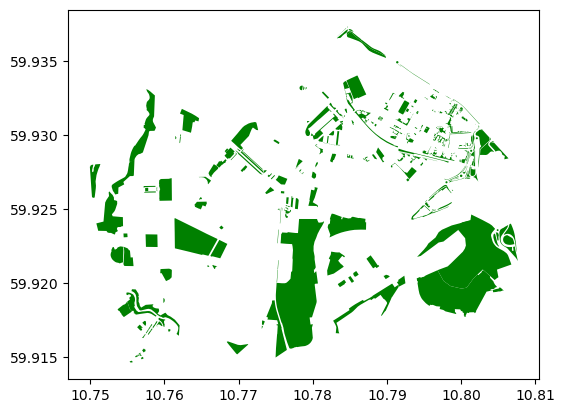

In [40]:
parks.plot(color="green") 

### Plotting av dataene

La oss lage et kart ut av gatene, bygningene, restaurantene og områdepolygonet.

<Axes: >

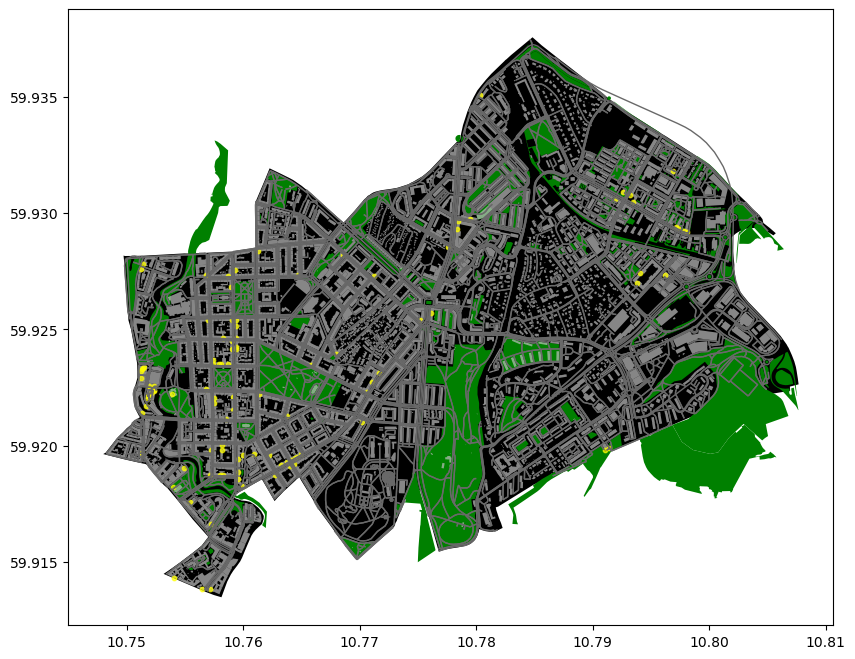

In [41]:
import matplotlib
figure, ax = matplotlib.pyplot.subplots(figsize=(12,8))

# Plot avtrykket
area.plot(ax=ax, facecolor="black")

# Plot parkene
parks.plot(ax=ax, facecolor="green")

# Plot gate 'kanter'
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

# Plot bygningene
buildings.plot(ax=ax, facecolor="silver", alpha=0.7)

# Plot restaurantene
restaurants.plot(ax=ax, color="yellow", alpha=0.7, markersize=10)

Kult! Nå har vi et kart der vi har plottet restaurantene, bygningene,
gatene og grensene for det valgte området 'Grünerløkka' i Oslo. Og
alt dette krever bare noen få linjer med kode. Ganske flott!

:::{admonition} Sjekk din forståelse
:class: hint

Hent OpenStreetMap-data fra et annet område! Last ned disse elementene ved hjelp av
OSMnx-funksjoner fra ditt interesseområde:
    
- Utstrekning av området ved hjelp av `geocode_to_gdf()`
- Gate-nettverk ved hjelp av `graph_from_place()`, og konverter til geo-data frame ved hjelp av
  `graph_to_gdfs()`
- Bygningsavtrykk (og andre geometrier) ved hjelp av `geometries_from_place()`
  og passende tags.
    
*Merk, jo større område du velger, jo lenger tid tar det å hente data
fra API!*

In [ ]:
# Spesifiser navnet som brukes for å søke etter dataene. Sjekk at steds-
# navnet er gyldig fra https://nominatim.openstreetmap.org/ui/search.html
MY_PLACE = ""

In [ ]:
# Hent gate-nettverk

In [ ]:
# Hent bygningsavtrykk

In [ ]:
# Plot dataene

## Videre lesing

For å analysere OpenStreetMap-data over store områder, er det ofte mer effektivt og
meningsfullt å laste ned dataene på en gang, i stedet for separate spørringer til
API. Slike datadumper fra OpenStreetMap er tilgjengelige i forskjellige filformater,
OSM [Protocolbuffer Binary
Format](https://wiki.openstreetmap.org/wiki/PBF_Format) (PBF) er en av
dem. Datautdrag som dekker hele land og kontinenter er tilgjengelige, for
eksempel, på [download.geofabrik.de](https://download.geofabrik.de/).

[Pyrosm](https://pyrosm.readthedocs.io/) er en Python-pakke for lesing
av OpenStreetMap-data fra PBF-filer til `geopandas.GeoDataFrames`. Pyrosm gjør
det enkelt å hente vei-nettverk, bygninger, interessepunkter (POI), arealbruk,
naturlige elementer, administrative grenser og mye mer - likt OSMnx,
men tilpasset analyser av store områder.  Mens OSMnx leser dataene fra
Overpass API, leser pyrosm dataene fra en lokal PBF-fil.

Les mer om henting og bruk av pbf-filer som kilde for å analysere
OpenStreetMap-data i Python fra [pyrosm
dokumentasjonen](https://pyrosm.readthedocs.io/en/latest/basics.html#protobuf-file-what-is-it-and-how-to-get-one).